<a href="https://colab.research.google.com/github/yohannes242005/thesis/blob/main/1commont%20updateable_last_print.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
import numpy as np
import os
import glob
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense,Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
from keras import backend as K



from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [4]:
def k_means_segmentation(img):
  twoDimage = img.reshape((-1,3))
  twoDimage = np.float32(twoDimage)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  attempts=1
  ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  return result_image

In [5]:
SIZE = 128
train_image = []
train_label = []
for dir_path in glob.glob("/content/drive/My Drive/final pepper dataset one folder3,330/*"):
    label = dir_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = color_mask_segmentation(img)
        #img = cv2.GaussianBlur(img,(5,5),0)

        train_image.append(img)
        train_label.append(label)
train_image = np.array(train_image)
train_label = np.array(train_label)

/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/78Fr.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/89Fr.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/1.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/2.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/3.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/4.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/5.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/6.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/7.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/8.jpg
/content/drive/My Dri

In [6]:
from sklearn import preprocessing
from keras.utils.all_utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(train_label)
train_labe_encoded = le.transform(train_label)

x_train,y_train = train_image,train_labe_encoded
x_train = x_train/255.0
y_train_one_hot = to_categorical(y_train)

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_train,y_train_one_hot,test_size=0.30,shuffle=True,random_state=42,stratify=y_train_one_hot)

x_validation,x_test,y_validation,y_test = train_test_split(x_test,y_test,test_size=0.5,shuffle=True,random_state=42,stratify=y_test)

In [8]:
model_1 = Sequential()
model_1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape = (128,128,3)))
model_1.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))


model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_1.add(BatchNormalization())

model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_1.add(BatchNormalization())

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_1.add(Flatten())
#model_1.add(Dropout(0.005))
model_1.add(Dense(units=6, activation="softmax"))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 3)         1731      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 3)        0         
 2D)                                                    

In [21]:
# tell the model what cost and optimization method to use
model_1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
# fit the model
r = model_1.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation))

Epoch 1/100
70/70 [==============================] - 4s 45ms/step - loss: 4.1498 - accuracy: 0.1754 - val_loss: 4.4484 - val_accuracy: 0.2380
Epoch 2/100
70/70 [==============================] - 3s 38ms/step - loss: 1.3571 - accuracy: 0.4434 - val_loss: 1.7853 - val_accuracy: 0.4322
Epoch 3/100
70/70 [==============================] - 3s 38ms/step - loss: 1.0576 - accuracy: 0.5557 - val_loss: 1.0844 - val_accuracy: 0.5595
Epoch 4/100
70/70 [==============================] - 3s 38ms/step - loss: 0.8726 - accuracy: 0.6685 - val_loss: 0.8492 - val_accuracy: 0.6576
Epoch 5/100
70/70 [==============================] - 3s 39ms/step - loss: 0.7104 - accuracy: 0.7602 - val_loss: 0.7108 - val_accuracy: 0.7662
Epoch 6/100
70/70 [==============================] - 3s 41ms/step - loss: 0.6088 - accuracy: 0.8089 - val_loss: 0.6053 - val_accuracy: 0.7871
Epoch 7/100
70/70 [==============================] - 3s 39ms/step - loss: 0.5240 - accuracy: 0.8385 - val_loss: 0.5132 - val_accuracy: 0.8267
Epoch 

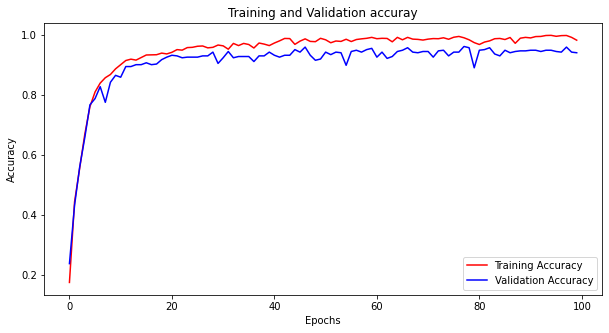

<Figure size 2160x1080 with 0 Axes>

In [23]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,5))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.legend(loc=0)

plt.figure(figsize=(30,15))

#show the graph

plt.show()
#score = conc_model.evaluate(x_validation,y_validation)
#print('Training Accuracy:', score[1])
#print('Testing loss :', score[0])

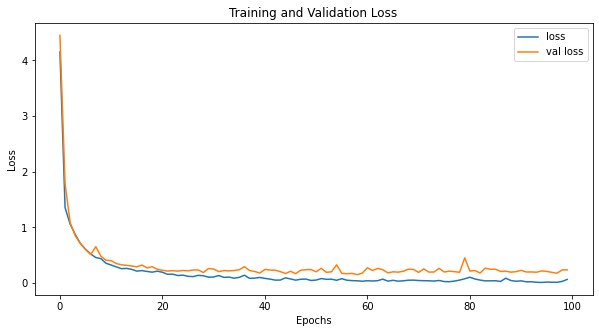

<Figure size 432x288 with 0 Axes>

In [24]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(10,5))

 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

<Figure size 2520x360 with 0 Axes>

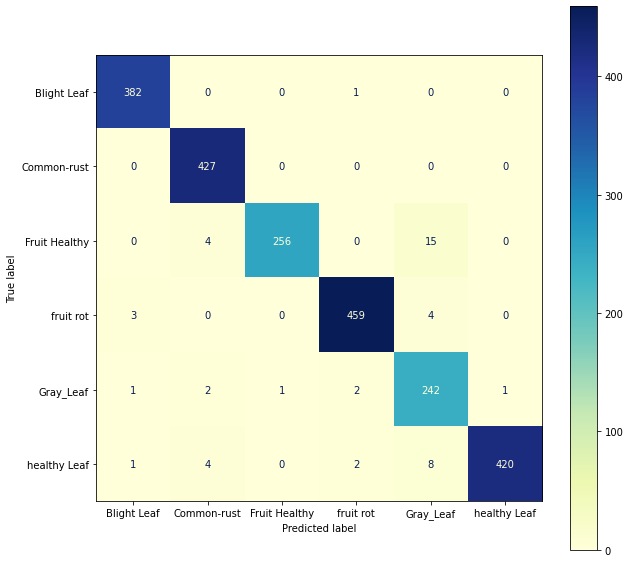

70/70 [==============================] - 1s 12ms/step - loss: 0.0569 - accuracy: 0.9781
Training Accuracy: 0.9780760407447815
Training loss : 0.05692513287067413
              precision    recall  f1-score   support

Blight- Leaf       0.99      1.00      0.99       383
Common- rust       0.98      1.00      0.99       427
FruitHealthy       1.00      0.93      0.96       275
 fruit - rot       0.99      0.98      0.99       466
 Gray _ Leaf       0.90      0.97      0.93       249
 healthyLeaf       1.00      0.97      0.98       435

    accuracy                           0.98      2235
   macro avg       0.97      0.98      0.97      2235
weighted avg       0.98      0.98      0.98      2235



In [29]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_1.predict([x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_y = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_y, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_1.evaluate([x_train],y_train)
print('Training Accuracy:', score[1])
print('Training loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight- Leaf','Common- rust','FruitHealthy','fruit - rot','Gray _ Leaf','healthyLeaf']
print(classification_report(round_pred_y, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

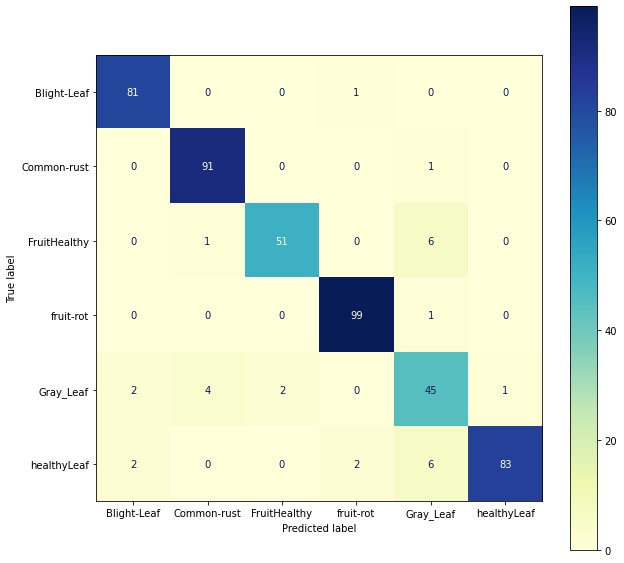

15/15 [==============================] - 0s 16ms/step - loss: 0.2388 - accuracy: 0.9395
Validation Accuracy: 0.9394571781158447
validation loss : 0.2388479858636856
              precision    recall  f1-score   support

Blight- Leaf       0.95      0.99      0.97        82
Common- rust       0.95      0.99      0.97        92
FruitHealthy       0.96      0.88      0.92        58
 fruit - rot       0.97      0.99      0.98       100
 Gray _ Leaf       0.76      0.83      0.80        54
 healthyLeaf       0.99      0.89      0.94        93

    accuracy                           0.94       479
   macro avg       0.93      0.93      0.93       479
weighted avg       0.94      0.94      0.94       479



In [31]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_1.predict([x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_x = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_x, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight-Leaf','Common-rust','FruitHealthy','fruit-rot','Gray_Leaf','healthyLeaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_1.evaluate([x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight- Leaf','Common- rust','FruitHealthy','fruit - rot','Gray _ Leaf','healthyLeaf']
print(classification_report(round_pred_x, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

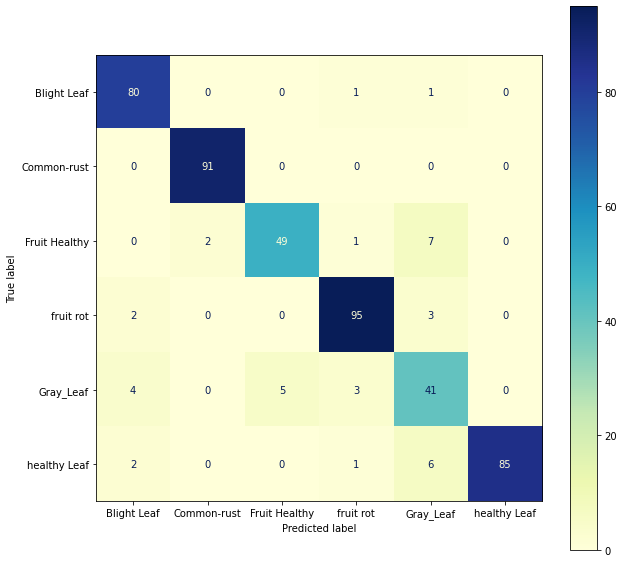

15/15 [==============================] - 0s 15ms/step - loss: 0.3165 - accuracy: 0.9207
Test Accuracy: 0.9206680655479431
Test loss : 0.3164609670639038
              precision    recall  f1-score   support

Blight- Leaf       0.91      0.98      0.94        82
Common- rust       0.98      1.00      0.99        91
FruitHealthy       0.91      0.83      0.87        59
 fruit - rot       0.94      0.95      0.95       100
 Gray _ Leaf       0.71      0.77      0.74        53
 healthyLeaf       1.00      0.90      0.95        94

    accuracy                           0.92       479
   macro avg       0.91      0.91      0.91       479
weighted avg       0.92      0.92      0.92       479



In [32]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_1.predict([x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_z = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_z, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_1.evaluate([x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight- Leaf','Common- rust','FruitHealthy','fruit - rot','Gray _ Leaf','healthyLeaf']
print(classification_report(round_pred_z, round_pred, target_names=target_names))

In [9]:
# (3) Create a sequential model
model_2 = Sequential()

# (3) Create a sequential model
model_2 = Sequential()

# 1st Convolutional Layer
model_2.add(Conv2D(filters=3, input_shape=(128,128,3), kernel_size=(3,3),\
 strides=(4,4), padding='same'))
model_2.add(Activation('relu'))
# Pooling 
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation before passing it to the next layer
model_2.add(BatchNormalization())


# 2nd Convolutional Layer
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Activation('relu'))
# Pooling
model_2.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model_2.add(BatchNormalization())


# 3rd Convolutional Layer
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'))
model_2.add(Activation('relu'))
# Batch Normalisation
model_2.add(BatchNormalization())


# 4th Convolutional Layer
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Activation('relu'))
# Batch Normalisation
model_2.add(BatchNormalization())


# Add Dropout to prevent overfitting
#model_2.add(Dropout(0.4))
# Batch Normalisation
model_2.add(BatchNormalization())

#  output Layer 
model_2.add(Flatten())
model_2.add(Dense(6,activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 3)         84        
                                                                 
 activation (Activation)     (None, 32, 32, 3)         0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 3)        0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 3)         84        
                                                                 
 activation_1 (Activation)   (None, 16, 16, 3)        

In [33]:
# tell the model what cost and optimization method to use
model_2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
# fit the model
r = model_2.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation))

Epoch 1/100
70/70 [==============================] - 2s 14ms/step - loss: 3.2278 - accuracy: 0.2577 - val_loss: 1.9908 - val_accuracy: 0.3445
Epoch 2/100
70/70 [==============================] - 1s 10ms/step - loss: 1.4389 - accuracy: 0.4295 - val_loss: 1.4353 - val_accuracy: 0.4823
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 1.1928 - accuracy: 0.5463 - val_loss: 1.2124 - val_accuracy: 0.5511
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 1.0761 - accuracy: 0.6045 - val_loss: 1.0537 - val_accuracy: 0.6200
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 0.9860 - accuracy: 0.6385 - val_loss: 0.9724 - val_accuracy: 0.6701
Epoch 6/100
70/70 [==============================] - 1s 10ms/step - loss: 0.9355 - accuracy: 0.6515 - val_loss: 0.9161 - val_accuracy: 0.6743
Epoch 7/100
70/70 [==============================] - 1s 10ms/step - loss: 0.8894 - accuracy: 0.6716 - val_loss: 0.9040 - val_accuracy: 0.6889
Epoch 8/1

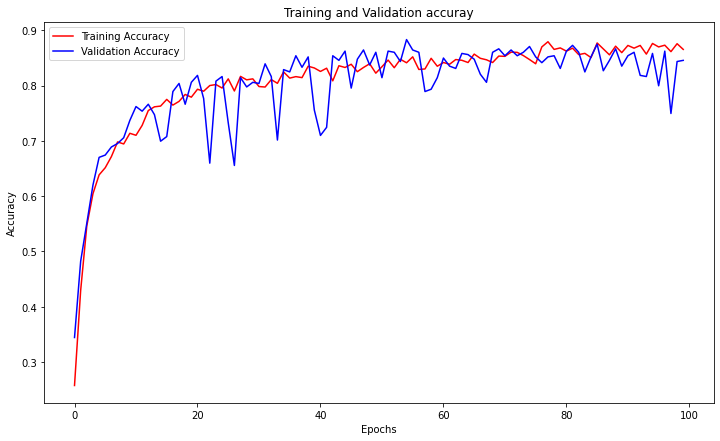

<Figure size 432x288 with 0 Axes>

70/70 [==============================] - 0s 6ms/step - loss: 0.2640 - accuracy: 0.9047


In [35]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12,7))

 

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()
score = model_2.evaluate(x_train,y_train)
#print('Training Accuracy:', score[1])
#print('Training loss :', score[0])

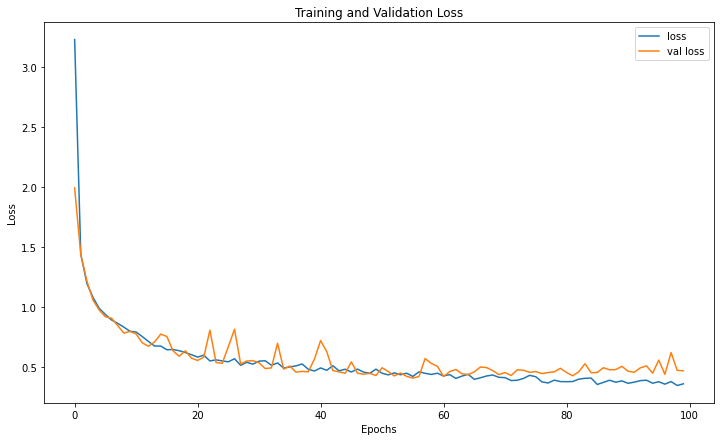

<Figure size 432x288 with 0 Axes>

In [36]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12,7))

 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

<Figure size 2520x360 with 0 Axes>

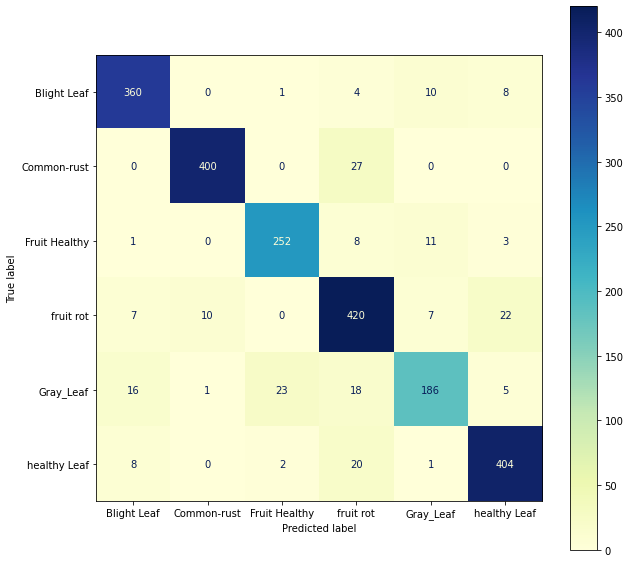

70/70 [==============================] - 0s 6ms/step - loss: 0.2640 - accuracy: 0.9047
Training Accuracy: 0.9046980142593384
Training loss : 0.26399368047714233
              precision    recall  f1-score   support

Blight- Leaf       0.92      0.94      0.93       383
Common- rust       0.97      0.94      0.95       427
FruitHealthy       0.91      0.92      0.91       275
 fruit - rot       0.85      0.90      0.87       466
 Gray _ Leaf       0.87      0.75      0.80       249
healthy Leaf       0.91      0.93      0.92       435

    accuracy                           0.90      2235
   macro avg       0.90      0.90      0.90      2235
weighted avg       0.91      0.90      0.90      2235



In [41]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_2.predict([x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_f = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_f, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_2.evaluate([x_train],y_train)
print('Training Accuracy:', score[1])
print('Training loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight- Leaf','Common- rust','FruitHealthy','fruit - rot','Gray _ Leaf','healthy Leaf']
print(classification_report(round_pred_f, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

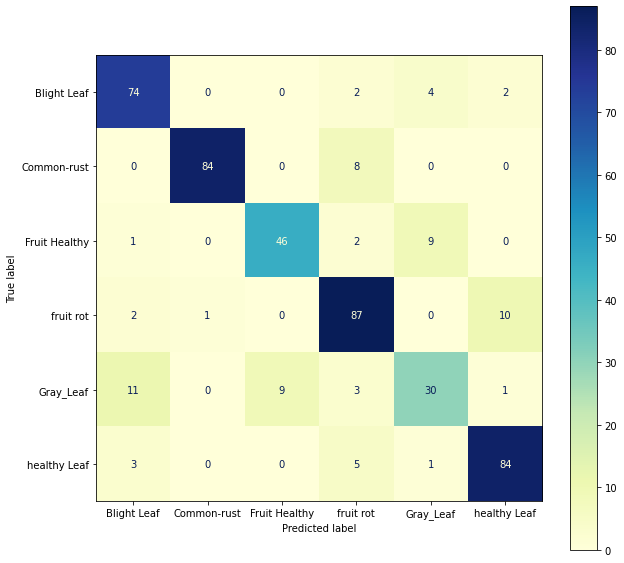

15/15 [==============================] - 0s 6ms/step - loss: 0.4658 - accuracy: 0.8455
Validation Accuracy: 0.8455114960670471
validation loss : 0.4658094048500061
              precision    recall  f1-score   support

Blight- Leaf       0.81      0.90      0.86        82
Common- rust       0.99      0.91      0.95        92
FruitHealthy       0.84      0.79      0.81        58
 fruit - rot       0.81      0.87      0.84       100
 Gray _ Leaf       0.68      0.56      0.61        54
healthy Leaf       0.87      0.90      0.88        93

    accuracy                           0.85       479
   macro avg       0.83      0.82      0.83       479
weighted avg       0.85      0.85      0.84       479



In [42]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_2.predict([x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_g = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_g, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_2.evaluate([x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight- Leaf','Common- rust','FruitHealthy','fruit - rot','Gray _ Leaf','healthy Leaf']
print(classification_report(round_pred_g, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

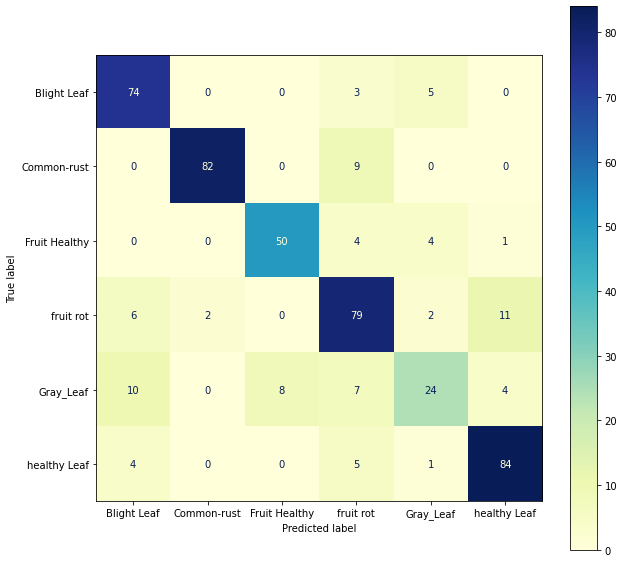

15/15 [==============================] - 0s 6ms/step - loss: 0.4864 - accuracy: 0.8205
Test Accuracy: 0.8204593062400818
Test loss : 0.48642733693122864
              precision    recall  f1-score   support

Blight- Leaf       0.79      0.90      0.84        82
Common- rust       0.98      0.90      0.94        91
FruitHealthy       0.86      0.85      0.85        59
 fruit - rot       0.74      0.79      0.76       100
 Gray _ Leaf       0.67      0.45      0.54        53
healthy Leaf       0.84      0.89      0.87        94

    accuracy                           0.82       479
   macro avg       0.81      0.80      0.80       479
weighted avg       0.82      0.82      0.82       479



In [43]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_2.predict([x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_h = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_h, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_2.evaluate([x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight- Leaf','Common- rust','FruitHealthy','fruit - rot','Gray _ Leaf','healthy Leaf']
print(classification_report(round_pred_h, round_pred, target_names=target_names))

VGG16 and Alex netConcatnation proposed model

In [10]:
from keras.layers.merge import concatenate
x1 =  model_1.get_layer('dense').output
x2 = model_2.get_layer('dense_1').output
x1 = Flatten()(x1)
x2 = Flatten()(x2)
out = concatenate([x1,x2])
out = Dense(6,activation='softmax')(out)
conc_model = Model(inputs = ([model_1.input,model_2.input]),outputs = out)
conc_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_10_input (InputLayer)   [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_input (InputLayer)      [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 32, 32, 3)    84          ['conv2d_10_input[0][0]']        
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
conc_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# fit the model
r = conc_model.fit([x_train,x_train],y_train,epochs=400,validation_data=([x_validation,x_validation],y_validation))

Epoch 1/400
70/70 [==============================] - 10s 79ms/step - loss: 1.5724 - accuracy: 0.4591 - val_loss: 1.7802 - val_accuracy: 0.2088
Epoch 2/400
70/70 [==============================] - 3s 45ms/step - loss: 1.3337 - accuracy: 0.6362 - val_loss: 1.7317 - val_accuracy: 0.2380
Epoch 3/400
70/70 [==============================] - 3s 43ms/step - loss: 1.2051 - accuracy: 0.6975 - val_loss: 1.6105 - val_accuracy: 0.3841
Epoch 4/400
70/70 [==============================] - 3s 43ms/step - loss: 1.0878 - accuracy: 0.7767 - val_loss: 1.4366 - val_accuracy: 0.4551
Epoch 5/400
70/70 [==============================] - 3s 43ms/step - loss: 1.0075 - accuracy: 0.7879 - val_loss: 1.1391 - val_accuracy: 0.7182
Epoch 6/400
70/70 [==============================] - 3s 43ms/step - loss: 0.9366 - accuracy: 0.7960 - val_loss: 0.9891 - val_accuracy: 0.7912
Epoch 7/400
70/70 [==============================] - 3s 43ms/step - loss: 0.8690 - accuracy: 0.8112 - val_loss: 0.9485 - val_accuracy: 0.7453
Epoch

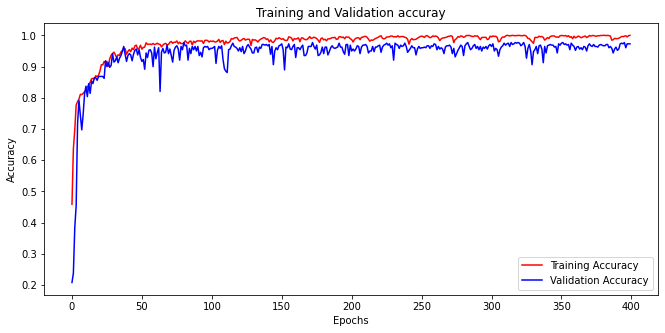

<Figure size 2160x1080 with 0 Axes>

In [20]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(11,5))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(loc=0)

plt.figure(figsize=(30,15))

#show the graph

plt.show()
#score = conc_model.evaluate(x_validation,y_validation)
#print('Training Accuracy:', score[1])
#print('Testing loss :', score[0])

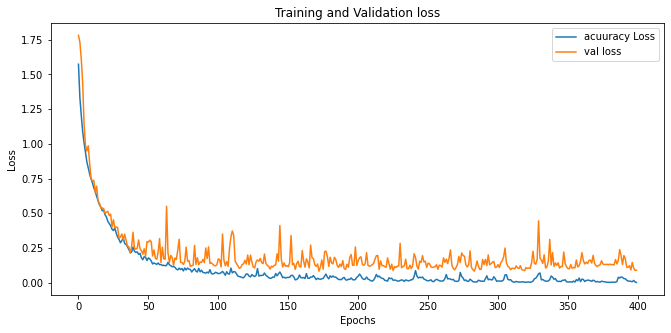

<Figure size 432x288 with 0 Axes>

In [14]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(11,5))
 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'acuuracy Loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

<Figure size 2520x360 with 0 Axes>

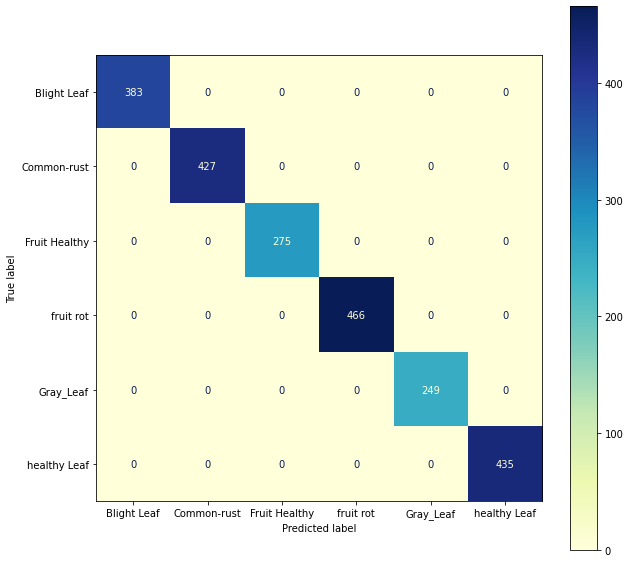

70/70 [==============================] - 1s 14ms/step - loss: 0.0019 - accuracy: 1.0000
Training Accuracy: 1.0
Training loss : 0.0019226502627134323
               precision    recall  f1-score   support

  Blight Leaf       1.00      1.00      1.00       383
  Common-rust       1.00      1.00      1.00       427
Fruit Healthy       1.00      1.00      1.00       275
  fruit - rot       1.00      1.00      1.00       466
  Gray _ Leaf       1.00      1.00      1.00       249
 healthy-Leaf       1.00      1.00      1.00       435

     accuracy                           1.00      2235
    macro avg       1.00      1.00      1.00      2235
 weighted avg       1.00      1.00      1.00      2235



In [15]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_train,x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_c = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_c, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_train,x_train],y_train)

print('Training Accuracy:', score[1]) 
print('Training loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit - rot','Gray _ Leaf','healthy-Leaf']
print(classification_report(round_pred_c, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

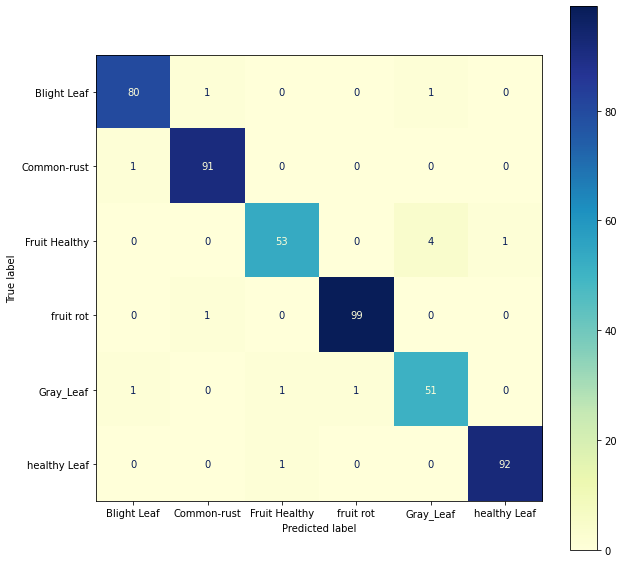

15/15 [==============================] - 0s 14ms/step - loss: 0.0907 - accuracy: 0.9729
Validation Accuracy: 0.9728600978851318
validation loss : 0.09066174924373627
               precision    recall  f1-score   support

  Blight-Leaf       0.98      0.98      0.98        82
Common - rust       0.98      0.99      0.98        92
Fruit Healthy       0.96      0.91      0.94        58
  fruit - rot       0.99      0.99      0.99       100
  Gray _ Leaf       0.91      0.94      0.93        54
 healthy-Leaf       0.99      0.99      0.99        93

     accuracy                           0.97       479
    macro avg       0.97      0.97      0.97       479
 weighted avg       0.97      0.97      0.97       479



In [16]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_validation,x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_d = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_d, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_validation,x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight-Leaf','Common - rust','Fruit Healthy','fruit - rot','Gray _ Leaf','healthy-Leaf']
print(classification_report(round_pred_d, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

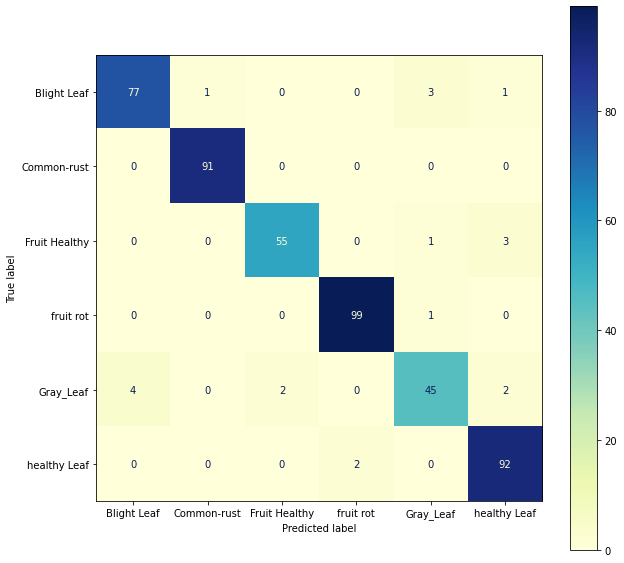

15/15 [==============================] - 0s 15ms/step - loss: 0.1386 - accuracy: 0.9582
Test Accuracy: 0.9582463502883911
Test loss : 0.13862502574920654
               precision    recall  f1-score   support

  Blight Leaf       0.95      0.94      0.94        82
  Common-rust       0.99      1.00      0.99        91
Fruit Healthy       0.96      0.93      0.95        59
    fruit rot       0.98      0.99      0.99       100
    Gray_Leaf       0.90      0.85      0.87        53
 healthy Leaf       0.94      0.98      0.96        94

     accuracy                           0.96       479
    macro avg       0.95      0.95      0.95       479
 weighted avg       0.96      0.96      0.96       479



In [17]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_test,x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_e = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_e, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_test,x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf']
print(classification_report(round_pred_e, round_pred, target_names=target_names))